# Logistic Regression

* The Logistic Regression Algorithm deals in discrete values whereas the Linear Regression Algorithm handles predictions in continuous values. This means that Logistic Regression is a better option for binary classification. An event in Logistic Regression is classified as 1 if it occurs and it is classified as 0 otherwise. Hence, the probability of a particular event occurrence is predicted based on the given predictor variables.

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns


In [79]:
df=pd.read_csv('titanic_train.csv')

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [81]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [82]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


* There should be no missing Entries,Categorical data for algorithm


# EDA-(Exploratory Data Analysis)

In [85]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [84]:
100*pd.isnull(df).sum()/len(df)
#Finding out number of missing enteries in every columns

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

# Strategies for  Handling Missing Data 
* Identify Missing Data 
* Discard the columns having too much of missing data (>25%)
* Discard the rows having missing entries, if the missing enteries are too less(<5%)
* Treat/Input the missing entries in columns
* Try to fill fake enteries which doesn't impact overall data
* fill using mean values

* fill using some inputers 
-----------------------------------
* Refer online for more handling

<AxesSubplot:>

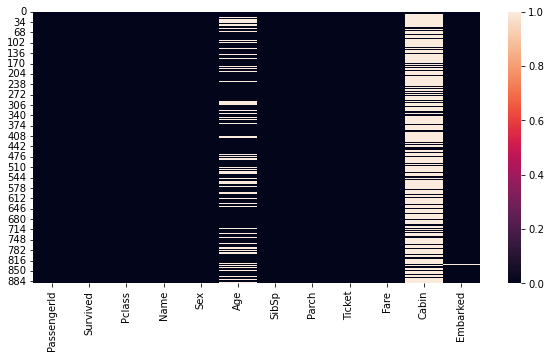

In [69]:
# Visualizing Missing Entries through Graphs
figure=plt.figure(figsize=(10,5))
sns.heatmap(pd.isnull(df))
#Here you can also see cabin is full of NULL values

* Cabin will be droped down as there is no way we will be inputing soo many values in cabin column(as to handle missing data)

In [70]:
#Observing from the above heat map we can also see there are some missing enteries
df['Age'].isnull().sum()
#this will give the total Missing enteries

177

In [71]:
# Age is something we can fill in this case
# In order to fill we will be using the mean values 
df['Age'].mean()
# Mean age of the people present at the titanic is 29.something
#Using this we will input all the  missing enteries
#This is one of the easiest method of filling missing enteries as to fill their mean values which will not affect the model prediction and training data

29.69911764705882

In [72]:
#Checking again for null values
df["Age"].isnull().sum()
#After this we will be begning with the univariate analysis

177

In [73]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [74]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Univariate Analysis

In [75]:
target=['Survived']
cat_cols=['Sex','Embarked','Pclass']
num_cols=['Age','SibSp','Parch','Fare']#Here parch is the showing who were travelling with parents
Drop_cols=['Cabin','PassengerId','Name','Ticket']#As These columns as nothing to do with our prediction we will drop them

Sex
female    314
male      577
Name: Sex, dtype: int64


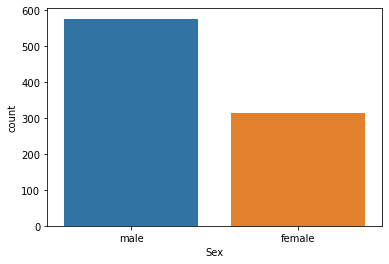

Embarked
C    168
Q     77
S    644
Name: Embarked, dtype: int64


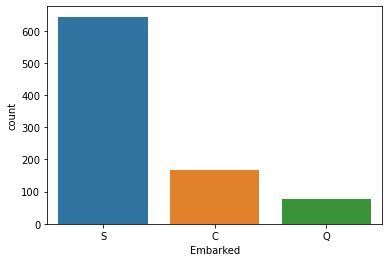

Pclass
1    216
2    184
3    491
Name: Pclass, dtype: int64


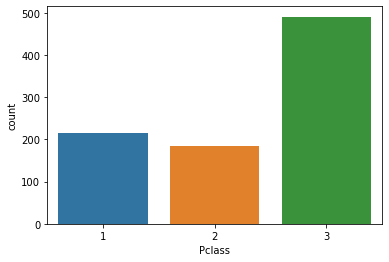

In [76]:
#Analyzing categorical columns
def cat_analyze(col):
    print(col)
    print(df[col].value_counts().sort_index())
    sns.countplot(data=df,x=df[col])#hue=df['Survived'] We can also do this but it will become bivariate
    plt.show()
for col in cat_cols:
    cat_analyze(col)

Age


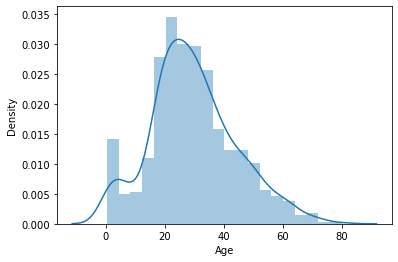

SibSp


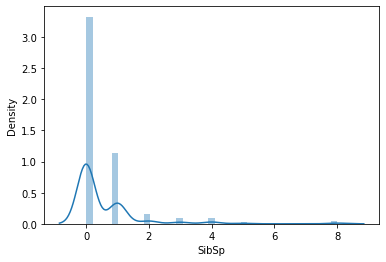

Parch


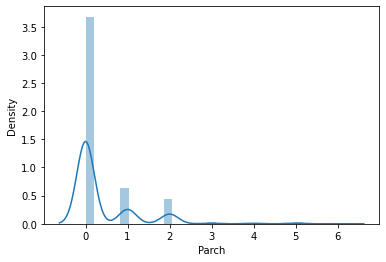

Fare


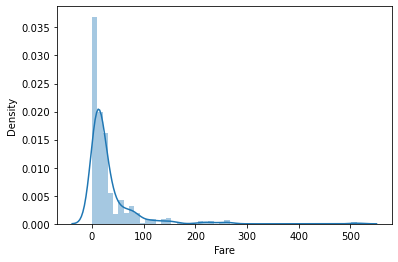

In [77]:
#Analyzing Numerical Columns
def num_analyze(col):
    print(col)
    sns.distplot(df[col])
    plt.show()
for col in num_cols:
    num_analyze(col)